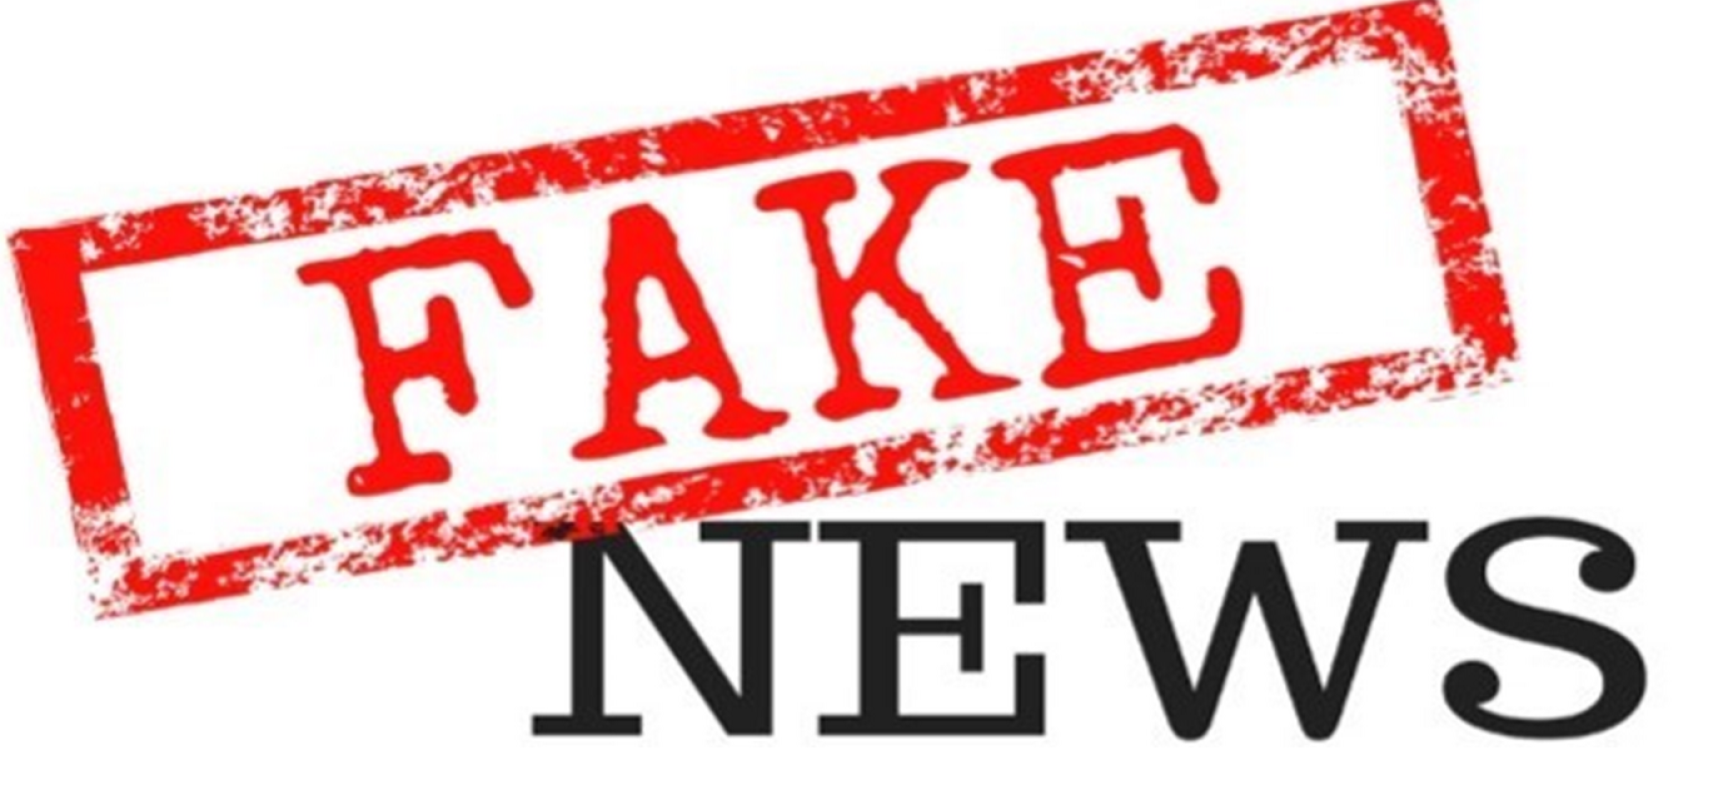

## Project 🚧

- Fake news is the biggest issues in the current area of internet and social media.


## Goals 🎯

- The model will focus on identifying fake news sources, based on combined articles formed from a source.
- we can predict with high level of confidence that any future articles from that source will also be fake news

#  Loading libraries & files

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
import re
import requests
from sklearn import tree
from nltk.util import ngrams
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.porter import PorterStemmer
import pickle
from sklearn.feature_extraction.text import CountVectorizer


# DATA Cleaning 

In [14]:
NewsF = pd.read_csv(r'C:\Users\Mtime\OneDrive\Bureau\train.csv')
NewsF.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
# here we can see the data set shape
NewsF.duplicated().sum()

0

In [16]:
# the first step of cleaning process is to see the number of Null Value
NewsF.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [17]:
#Also we can see the columns types
NewsF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [18]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# we can remove all null values from ower NewsF dataset 
NewsF= NewsF.fillna('')

In [20]:
NewsF.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [21]:
# we can merge the two columns,title and author

In [22]:
NewsF['Merge'] = NewsF['author'] + " " + NewsF['title']

In [23]:
NewsF['Merge'].head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: Merge, dtype: object

In [24]:
# so here we can use stemming, 
# this process of linguistoc normalization with we can variant form of word is reduce in to common word 
# here we can define a function 

In [25]:
stem = PorterStemmer()
def stemming(Merge):
    stemmed_Merge = re.sub('[^a-zA-Z]',' ',Merge) 
    stemmed_Merge = stemmed_Merge.split() 
    stemmed_Merge = [stem.stem(word) for word in stemmed_Merge if not word in stopwords.words('english')]
    stemmed_Merge = ' '.join(stemmed_Merge) 
    return stemmed_Merge

In [26]:
NewsF['Merge'] = NewsF['Merge'].apply(stemming)

In [27]:
# let's take a look to Merge column 
NewsF['Merge']

0        darrel lucu hous dem aid we didn even see come...
1        daniel j flynn flynn hillari clinton big woman...
2           consortiumnew com whi truth might get you fire
3        jessica purkiss civilian kill in singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper t i trump poster child for...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci is said...
20798    alex ansari nato russia to hold parallel exerc...
20799                       david swanson what keep f aliv
Name: Merge, Length: 20800, dtype: object

# EDA

1    10413
0    10387
Name: label, dtype: int64


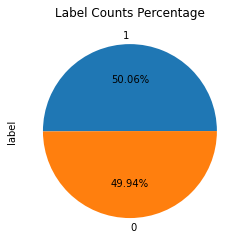

In [28]:
print(NewsF['label'].value_counts())
NewsF['label'].value_counts().plot(kind='pie', title='Label Counts Percentage', autopct='%1.2f%%')
plt.show()

In [29]:
# Find highest frequency words found in real news
stop_words = stopwords.words('english')

real_news_words = []
for index, row in NewsF.iterrows():
    text = row['Merge']

    # Convert to lower case
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    # Cleaning with regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    text_words = nltk.word_tokenize(text)
    
    # Remove stop words and add to list
    real_news_words.extend([str(w) for w in text_words if not w in stop_words])

In [30]:
news_words_df = pd.DataFrame(real_news_words, columns=['Words'])

# Value count dataframes
news_words_count = news_words_df['Words'].value_counts().reset_index()
news_words_count.columns = ['Words', 'Total Count']
news_words_percent = news_words_df['Words'].value_counts(normalize=True).reset_index().mul(100).round(1).astype(str) + '%'
news_words_percent.columns = ['Words', 'Percentage']

# Word count summary tables
news_words_summary_df = pd.DataFrame({"Words": news_words_count['Words'],
                                      "Total Count": news_words_count['Total Count'],
                                      "Percentage": news_words_percent['Percentage']})

# Formatting
news_words_summary_df['Total Count'] = news_words_summary_df.apply(lambda x: "{:,}".format(x['Total Count']), axis=1)
news_words_summary_df.head(10)

,Words,Total Count,Percentage
0,new,"7,915",3.6%
1,time,"6,675",3.0%
2,york,"6,415",2.9%
3,trump,"3,740",1.7%
4,breitbart,"2,756",1.3%
5,clinton,"1,272",0.6%
6,hillari,"1,267",0.6%
7,donald,905,0.4%
8,elect,768,0.3%
9,u,643,0.3%


In [31]:
wcloud_words = " ".join(word for word in news_words_df['Words'])
wcloud_words

'darrel lucu hous dem aid even see comey letter jason chaffetz tweet daniel j flynn flynn hillari clinton big woman campu breitbart consortiumnew com whi truth might get fire jessica purkiss civilian kill singl us airstrik identifi howard portnoy iranian woman jail fiction unpublish stori woman stone death adulteri daniel nussbaum jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart life life luxuri elton john favorit shark pictur stare dure long transcontinent flight alissa j rubin beno hamon win french socialist parti presidenti nomin new york time excerpt draft script donald trump q ampa black church pastor new york time megan twohey scott shane back channel plan ukrain russia courtesi trump associ new york time aaron klein obama organ action partner soro link indivis disrupt trump agenda chri tomlinson bbc comedi sketch real housew isi caus outrag amando flavio russian research discov secret nazi militari base treasur hunter arctic photo

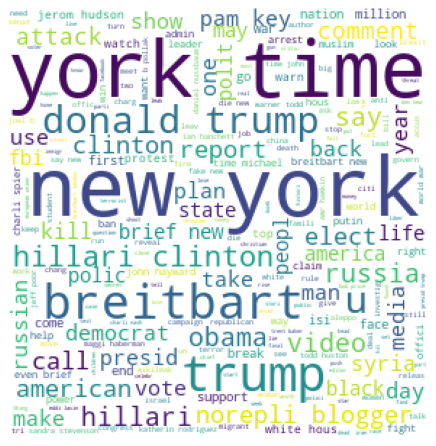

In [538]:
# Import PNG Pic
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/5/5/d/6/1194989754480445982tiger_graig_ryan_smith_-_01.svg.med.png',stream=True).raw))
# Create a word cloud image
wordcloud = WordCloud(background_color="white", max_words=1000, mask=transformed_mask,
               contour_width=3, contour_color='black').generate(wcloud_words)
import matplotlib.pyplot as plt 
plt.figure(figsize=[6,6])

plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# the  histograms of the  number of characters present in each sentence in Merge Column 

Text(0.5, 1.0, 'Number of characters in each sentence')

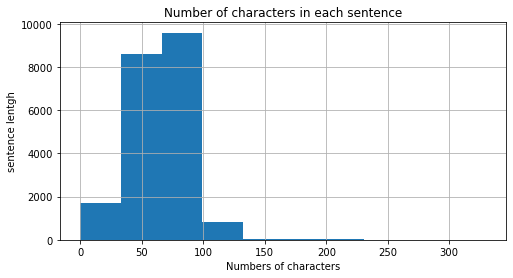

In [243]:
plt.figure(figsize=(8,4))
NewsF['Merge'].str.len().hist()

plt.xlabel("Numbers of characters")
plt.ylabel("sentence lentgh")
plt.title('Number of characters in each sentence')

# Bar chart of the StopWords

Text(0.5, 1.0, 'top_stopwords_barchart')

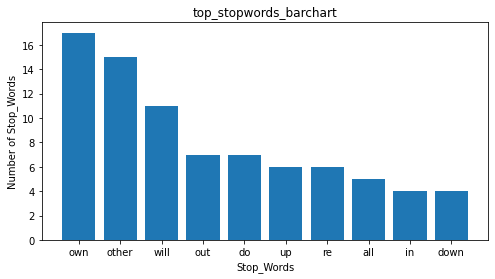

In [239]:
corpus=[]
new= NewsF['Merge'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.figure(figsize=(8,4))
plt.bar(x,y)
plt.xlabel("Stop_Words")
plt.ylabel("Number of Stop_Words")
plt.title('top_stopwords_barchart')


# The count of most frequent word in Merge Column 

<AxesSubplot:title={'center':'The number of 10  most frequent compound words'}>

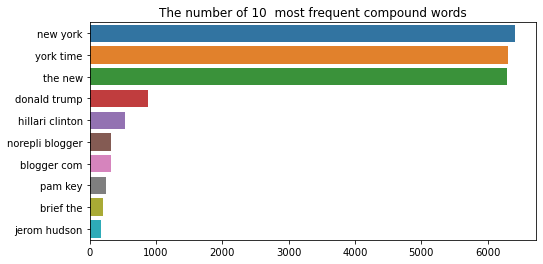

In [35]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(NewsF['Merge'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
plt.figure(figsize=(8,4))
plt.title('The number of 10  most frequent compound words')
sns.barplot(x=y,y=x)

In [37]:
X = NewsF['Merge']
Y = NewsF['label']

In [38]:
#TF-IDF Vectorizer known as the Term frequency-inverse document frequency, where the value rises proportionately to the number of times a word becomes 
#visible in the document but is neutralized by the frequency of the word in the collection. Term frequency can be defined as the number of times a word appears in
#the document divided by the total number of the document

In [39]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [40]:
# Now let's split the data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state=333)

In [42]:
X.shape

(20800, 17227)

In [43]:
Y.shape

(20800,)

In [44]:
X_test.shape

(4160, 17227)

# Supervised learning Part and Models implementation 

# Logistic Regression

- Logistic regression is common and is a useful regression method for solving the binary classification problem.
- handles the issues where multiple classes are present in the target variable.
- Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.
- Model Evaluation using Confusion Matrix.

In [45]:
Model_1 = LogisticRegression()
Model_1.fit(X_train, Y_train)
y_Predict = Model_1.predict(X_test) 
Model_1_accuracy = accuracy_score(y_Predict, Y_test)

## Accuracy

In [46]:
print('Accuracy: %.3f' % Model_1_accuracy)

Accuracy: 0.979


## Confusion_Matrix

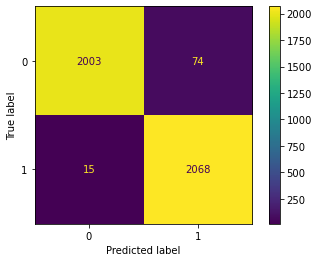

In [47]:
y_Predict = Model_1.predict(X_test) 
cfm=confusion_matrix(Y_test, y_Predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=Model_1.classes_)
disp.plot()


# ROC AUC curve

AUC for  is: 0.9785852688765302


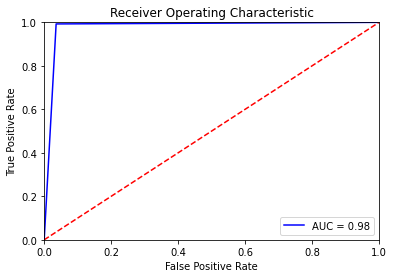

In [49]:
fpr, tpr, threshold = roc_curve(Y_test, y_Predict)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for  is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Multinomial Naive Bayes

- Multinomial Naive Bayes is one of the most popular supervised learning classifications that is used for the analysis of the categorical text data.
- Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP).
- It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

In [50]:
Model_2 = MultinomialNB()
Model_2.fit(X_train,Y_train)
y_predict = Model_2.predict(X_test)
y_predicty_accuracy =accuracy_score(y_predict, Y_test)


## Accuracy

In [51]:
print('accuracy for the Model_2 is:',y_predicty_accuracy)

accuracy for the Model_2 is: 0.9536057692307692


## Confusion_Matrix

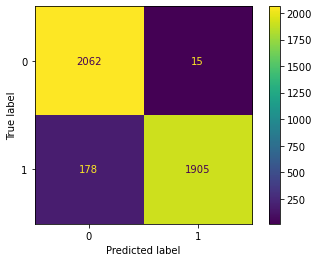

In [52]:
y_predict = Model_2.predict(X_test) 
cfm=confusion_matrix(Y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=Model_1.classes_)
disp.plot()

## ROC AUC curve

AUC for  is: 0.9536621863349846


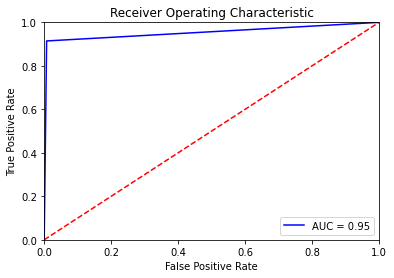

In [53]:
fpr, tpr, threshold = roc_curve(Y_test, y_predict)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for  is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Classifier

.A decision tree is a supervised machine learning classification algorithm used to build models like the structure of a tree

.In classification, the goal of the predictive model is to identify the class that generated a particular instance.

In [54]:
Model_3 = tree.DecisionTreeClassifier()
Model_3.fit(X_train,Y_train)
y_predict = Model_3.predict(X_test)
y_predict_accuracy =accuracy_score(y_predict, Y_test)


## Accuracy

In [55]:
print('accuracy for the Model_2 is:',y_predict_accuracy)

accuracy for the Model_2 is: 0.9954326923076923


## Confusion_Matrix

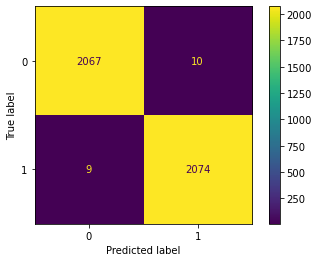

In [56]:
y_predict = Model_3.predict(X_test) 
cfm=confusion_matrix(Y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=Model_3.classes_)
disp.plot()

## ROC AUC curve

AUC for  is: 0.9954323360972228


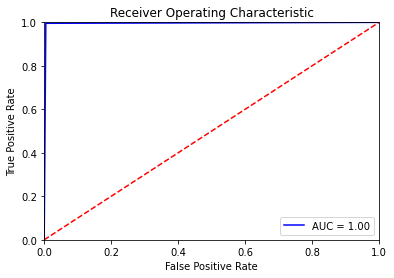

In [57]:
fpr, tpr, threshold = roc_curve(Y_test, y_predict)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for  is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# The  prediction for each Model

## Prediction for Logistic Regression

In [58]:
X_Predict = X_test[6]

y_Predict = Model_1.predict(X_Predict) 


if (y_Predict[0] == 0):
  print('The News in Real')
else:
  print('The News is Fake')


The News is Fake


## let's Test if it's is a Real or Fake 

In [59]:
News_f_test = pd.read_csv(r"C:\Users\Mtime\OneDrive\Bureau\test.csv")
News_f_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [60]:
News_f_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [61]:
News_f_test = News_f_test.fillna('')

In [62]:
News_f_test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [63]:
News_f_test['Merge'] = News_f_test['author'] + " " + News_f_test['title']
News_f_test['Merge'] = News_f_test['Merge'].apply(stemming)

In [64]:
X_test = News_f_test['Merge']
X_test = vectorizer.transform(X_test)

In [65]:
y_pred_final = Model_1.predict(X_test)
print(y_pred_final)

[0 1 1 ... 0 1 0]


In [66]:
y_pred_final.shape

(5200,)

In [67]:
News_f_test['label'] = y_pred_final

In [68]:
News_f_test.head(10)

,id,title,author,text,Merge,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld specter trump loosen tongu no...,0
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship readi strike terrorist near al...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dream nodapl nativ american leader vow ...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor tim tebow will attempt anoth com...,0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network keiser report meme war e,1
5,20805,Trump is USA's antique hero. Clinton will be n...,,Trump is USA's antique hero. Clinton will be n...,trump usa antiqu hero clinton next presid,1
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",pam key pelosi call fbi investig find out what...,0
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...,trevor loudon weekli featur profil randi shannon,1
8,20808,Urban Population Booms Will Make Climate Chang...,,Urban Population Booms Will Make Climate Chang...,urban popul boom will make climat chang wors,1
9,20809,,cognitive dissident,don't we have the receipt?,cognit dissid,1
